# MLE for Simple Linear Regression

This notebook explains the mathematics behind Lecture 3:  Simple Linear Regression.  Note that we are covering the theoretical basis for each lecture the week before the lecture!

In [2]:
## import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

# 1. Simple Linear Regression

In simple linear regression (SLR) we have a variable we would like to predict, $y$, and a single feature $x$.

$$
y =  \beta_0 + \beta_1 x + \epsilon,
$$

where $\beta_0, \beta_1 \in \mathbb{R}$ are constants we must estimate and we assume that $\epsilon \sim N(0,\sigma)$ is an error term independent of $x$.

### Visualizing the model

Let's think about what this model is saying about the outcome variable, $y$. For help we will look at the picture drawn below.

<img src="math_hour_assets/slr_curves.png" width="60%"></img>

Above we see both the systematic part and the random error. For a given value of $x$ you can find the theoretically possible values for $y$ by going to the line $\beta_0 + \beta_1 x$ and randomly drawing an error term from the normal distribution centered on the line. We can also see one of our key assumptions at play (minus a few artistic deficiencies on my part), no matter what the value of $x$, our errors are drawn from the same exact bell curve.

You can look at a 3D version of the same diagram [here](https://www.desmos.com/3d/09db6f9c8d).

Let's generate some synthetic data of this form to work with throughout the notebook:

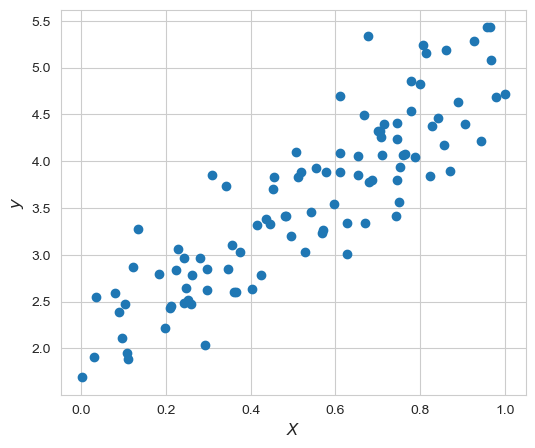

In [3]:
np.random.seed(216)

X = np.random.rand(100) # The x coordinates of our 100 random data points.  They are generated uniformly at random from [0,1].  Note that the 

b_0 = 2
b_1 = 3
sigma = 0.5

y = b_0 + b_1*X + np.random.normal(loc = 0, scale= sigma, size = 100)

plt.figure(figsize=(6,5))

plt.scatter(X, y)

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.show()

Because we have assumed independence of our observations the likelihood of observing $y$ given $X$ is:

$$
L(\beta_0, \beta_1, \sigma) = P\left(y|X;\beta_0,\beta_1, \sigma \right) = \prod_{i=1}^n P\left(y_i|x_i;\beta_0,\beta_1, \sigma \right) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{\left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2}{\sigma^2}\right)
$$

As usually we will instead minimize the negative log likelihood:

$$
\ell(\beta_0, \beta_1, \sigma) = \frac{n}{2}\log(2\pi) + n\log(\sigma) + \frac{1}{2\sigma^2}\sum_{i=1}^n \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2
$$

**Important Observation**:  Notice that minimizing $\ell$ will also minimize $\sum_{i=1}^n \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2$ as a function of $\beta_0$ and $\beta_1$ alone.  Thus the MLE line of best fit will **also** be the mean squared error minimizing regression.

We can now find the MLE estimates of $\hat{\beta}_0, \hat{\beta}_1$ and $\hat{\sigma}$ using differential calculus.  

$$
\begin{align*}
\frac{\partial \ell}{\partial \beta_0} 
&= -\frac{1}{\sigma^2}\sum_{i=1}^n \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)\\
&= -\frac{n}{\sigma^2} \left( \bar{y} - \beta_0 - \beta_1 \bar{x} \right)
\end{align*}
$$

Setting this partial derivative equal to zero immediately yields:

$$
\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}
$$

This has a nice geometric interpretation:  it says that MLE line of best fit will pass through the "center" of the data $(\bar{x}, \bar{y})$.

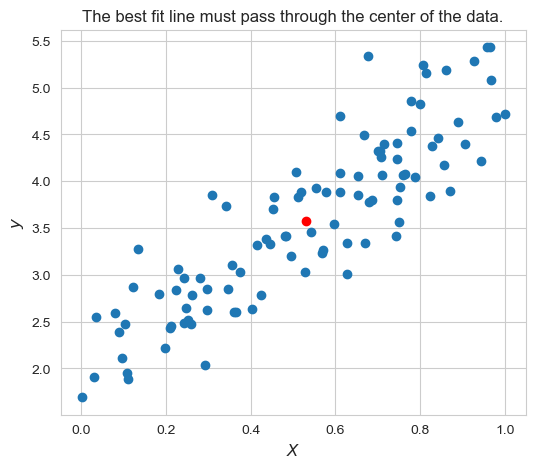

In [4]:
bar_x = X.mean()
bar_y = y.mean()

plt.figure(figsize=(6,5))

plt.scatter(X, y)
plt.plot(bar_x,bar_y, 'ro')

plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.title('The best fit line must pass through the center of the data.')
plt.show()

Now let's take the partial derivative with respect to $\beta_1$:


$$
\begin{align*}
\ell(\beta_0, \beta_1, \sigma) &= \frac{n}{2}\log(2\pi) + n\log(\sigma) + \frac{1}{2\sigma^2}\sum_{i=1}^n \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2\\
\frac{\partial \ell}{\partial \beta_1} &= 0 \\
-\frac{1}{2\sigma^2} \sum_{i=1}^n x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) &= 0\\
-\frac{1}{2\sigma^2}\sum_{i=1}^n x_i(y_i - (\bar{y} - \hat{\beta}_1 \bar{x}) - \hat{\beta}_1 x_i) &= 0 \\
-\frac{1}{2\sigma^2}\sum_{i=1}^n x_i((y_i - \bar{y}) - \hat{\beta}_1 (x_i - \bar{x})) &= 0\\
\end{align*}
$$

Now notice that $\sum_{i=1}^n (y_i - \bar{y})$ and $\sum_{i=1}^n (x_i - \bar{x})$ are both zero by definition of the mean.  So we can make this expression a bit prettier by adding and subtracting a nice form of zero.

$$
\begin{align*}
-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \bar{x})((y_i - \bar{y}) - \hat{\beta}_1 (x_i - \bar{x})) &= 0 \\
-\frac{1}{2\sigma^2}\left[ \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) - \hat{\beta}_1 \sum_{i=1}^n  (x_i - \bar{x})^2 \right] &= 0\\
\end{align*}
$$

Note that $\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$ is $(n-1)$ times the "sample covariance", while $\sum_{i=1}^n  (x_i - \bar{x})^2$ is $(n-1)$ times the "sample variance".

So we obtain:

$$
\hat{\beta}_1 = \frac{\operatorname{cov}(x,y)}{\operatorname{var}(x)}
$$

We have determined $\hat{\beta}_0$ and $\hat{\beta}_1$ which determines the line of best fit!  Let's calculate these now for our synthetic data to see how we did. 

In [5]:
b_1_hat = np.dot(X - X.mean(), y - y.mean())/np.dot(X - X.mean(),X-X.mean())
b_0_hat = y.mean() - b_1_hat * X.mean()

print(b_0_hat, b_1_hat)

1.9972539379681875 2.9833184819617116


These MLE estimates of the parameters are very close to the true values of $2$ and $3$ respectively.

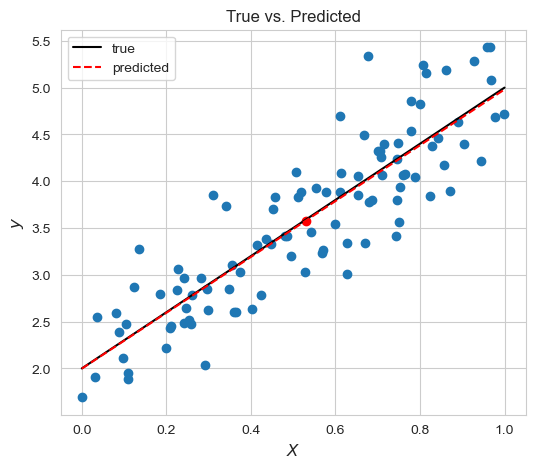

In [6]:
bar_x = X.mean()
bar_y = y.mean()

plt.figure(figsize=(6,5))

plt.scatter(X, y)
plt.plot(bar_x,bar_y, 'ro')

xs = np.linspace(0,1,1000)
ys_true = 2 + 3*xs
ys_predicted = b_0_hat + b_1_hat*xs
plt.plot(xs, ys_true, 'k', label = 'true')
plt.plot(xs, ys_predicted, 'r--', label = 'predicted')


plt.xlabel("$X$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

plt.legend(fontsize=10)

plt.title('True vs. Predicted')
plt.show()

We can now estimate $\hat{\sigma}$.  Recall that

$$
\ell(\beta_0, \beta_1, \sigma) = \frac{n}{2}\log(2\pi) + n\log(\sigma) + \frac{1}{2\sigma^2}\sum_{i=1}^n \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2
$$

We already have $\hat{\beta}_0$ and $\hat{\beta}_1$.  Letting $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$, we have 

$$
\frac{\partial \ell}{\partial \sigma} = \frac{n}{\sigma} - \frac{1}{\sigma^3} \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2
$$

and so

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

In other words, our MLE for the variance is just the mean squared error!  Note that, similar to the sample variance, this is also a **biased** estimator of the true parameter.  In this case the unbiased estimator uses an $n-2$ in the denominator in place of $n$.

##### 2. Deriving the Standard Error for $\hat{\beta_0}$ and $\hat{\beta_1}$

When we estimate a parameter, say $\theta$, the estimate of that parameter $\hat{\theta}$ is a statistic. Because we use a random sample of data observations to find $\hat{\theta}$, it has what is known as a sampling distribution. The standard error of an estimate is a measure of the variability of $\hat{\theta}$. You can find the standard error of the estimate, $\hat{\theta}$ by taking the square root of the variance of the estimate. 

Recall that the formula for $\hat{\beta_0}$ and $\hat{\beta_1}$ from SLR are:
- $\hat{\beta_1} = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2}$ 

- $\hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{x}$

We start with $\hat{\beta_0}$.

$$
\text{Var}(\hat{\beta_0}) = \text{Var}\left(\overline{y} - \hat{\beta_1}\overline{x}\right) = \text{Var}\left(\sum_{i=1}^n (\beta_0 + \beta_1x_i + \epsilon_i)/n \right) + \overline{x}^2 \text{Var}(\hat{\beta_1}) = \frac{\sigma^2}{n} + \overline{x}^2 \text{Var}(\hat{\beta_1}).
$$

Note that we are using the independence of the observations assumption to bring the variance into the sum with no covariance terms.

Now we just need the variance for $\hat{\beta_1}$. Notice that the only randomness in the formula for $\hat{\beta_1}$ is in the numerator. So we will focus on that.

$$
\sum_{i=1}^n \left(x_i - \overline{x}\right) \left(y_i - \overline{y}\right) = \sum_{i=1}^n \left(x_i - \overline{x} \right)y_i = \sum_{i=1}^n \left(x_i - \overline{x} \right) \left( \beta_0 + \beta_1 x_i + \epsilon_i \right),
$$

and thus

$$
\text{Var}(\hat{\beta_1}) = \frac{\text{Var}\left( \sum_{i=1}^n \left(x_i - \overline{x} \right) \left( \beta_0 + \beta_1 x_i + \epsilon_i \right) \right)}{\left(\sum_{i=1}^n \left( x_i - \overline{x} \right)^2\right)^2} = \frac{\sum_{i=1}^n \text{Var}\left( (x_i - \overline{x})\epsilon_i \right) }{\left(\sum_{i=1}^n \left( x_i - \overline{x} \right)^2\right)^2} = \frac{\sigma^2}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2},
$$

where again we are implicitly using the independence assumption.

Taking the square root of the two equations above gives the standard error. Also note that in practice you have to use the sample estimate of $\sigma^2$ which is $\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2} \approx MSE$.

It is important to note that we obtained 

$$
\begin{align*}
\text{Var}(\hat{\beta_1}) 
&=  \frac{\sigma^2}{\sum_{i=1}^n \left( x_i - \overline{x} \right)^2} \approx \frac{1}{n-1} \frac{\sigma^2}{ \frac{1}{n-1}\sum_{i=1}^n \left(x_i - \overline{x} \right)^2} \\
&= \frac{1}{n-1} \frac{\sigma^2}{\operatorname{var}(x)}
\end{align*}
$$

Thus  $\operatorname{Var}(\hat{\beta}_1) \sim n^{-1}$. 

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.  Modified by Steven Gubkin 2024.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)